# Assignment 2 by: Jordan Pang (s3902159)


In [21]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, pairwise_distances_argmin_min, silhouette_samples, davies_bouldin_score,silhouette_score
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn import cluster

# Task 1: Regression


In [2]:
#import csv without nulls and sample 2000 rows
sample1_df = pd.read_csv("A2data.csv", sep=";").dropna().sample(n=200)
sample1_df.info()
# write to csv
sample1_df.to_csv("s3902159-A2SampleOne.csv", index = False)

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 2772 to 2560
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         200 non-null    float64
 1   volatile acidity      200 non-null    float64
 2   citric acid           200 non-null    float64
 3   residual sugar        200 non-null    object 
 4   chlorides             200 non-null    float64
 5   free sulfur dioxide   200 non-null    object 
 6   total sulfur dioxide  200 non-null    object 
 7   density               200 non-null    object 
 8   pH                    200 non-null    float64
 9   sulphates             200 non-null    float64
 10  alcohol               200 non-null    float64
 11  quality               200 non-null    int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 20.3+ KB


In [3]:
# get alcohol and density
alc_dens_sample1 = sample1_df[["alcohol","density"]]
# convert density to float
alc_dens_sample1.loc[:, 'density'] = alc_dens_sample1['density'].astype(float)
alc_dens_sample1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 2772 to 2560
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  200 non-null    float64
 1   density  200 non-null    object 
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


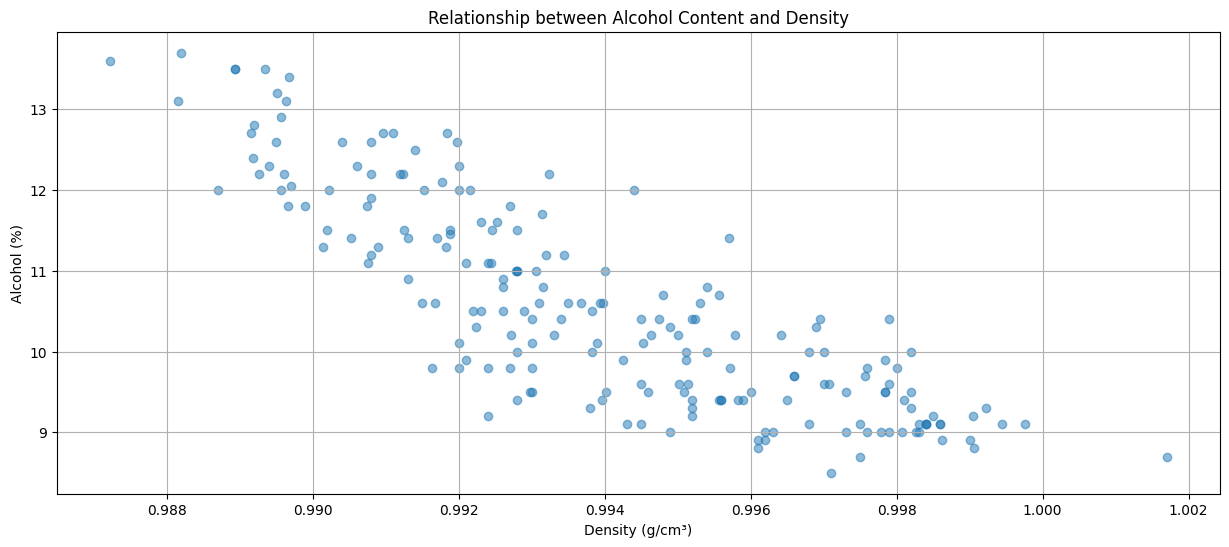

In [4]:
# scatterplot
plt.figure(figsize=(15, 6))
plt.scatter(alc_dens_sample1['density'], alc_dens_sample1['alcohol'], alpha=0.5)
plt.title('Relationship between Alcohol Content and Density')
plt.xlabel('Density (g/cm³)')
plt.ylabel('Alcohol (%)')
plt.grid(True)
plt.show()

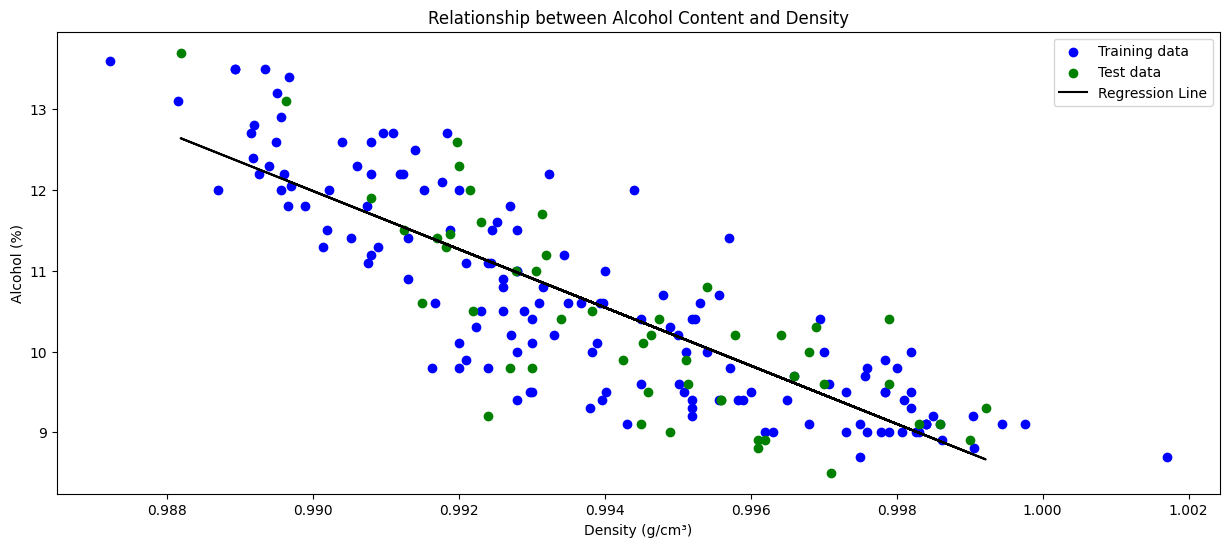

The coefficient of the model is: -360.5028670288192


In [5]:
# create linear regression model
linear_model = LinearRegression()

# prepare axis
X = alc_dens_sample1['density'].values.reshape(-1, 1)
y = alc_dens_sample1['alcohol'].values

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# fit model
linear_model.fit(X_train, y_train)

# predict model
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

# plot
plt.figure(figsize=(15, 6))  
plt.scatter(X_train, y_train, color='blue', label='Training data') 
plt.scatter(X_test, y_test, color='green', label='Test data')  
plt.plot(X_test, y_pred_test, color='black', label='Regression Line') 

plt.title('Relationship between Alcohol Content and Density')
plt.xlabel('Density (g/cm³)')
plt.ylabel('Alcohol (%)')
plt.legend()

plt.show()

# get coeff
print(f"The coefficient of the model is: {linear_model.coef_[0]}")

# Task 2: Classification

In [6]:
# import csv without nulls and sample 2000 rows
sample2_df = pd.read_csv("A2data.csv", sep=";").dropna().sample(n=500)
sample2_df.info()
# write to csv
sample2_df.to_csv("s3902159-A2SampleTwo.csv", index = False)

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 4325 to 3654
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         500 non-null    float64
 1   volatile acidity      500 non-null    float64
 2   citric acid           500 non-null    float64
 3   residual sugar        500 non-null    object 
 4   chlorides             500 non-null    float64
 5   free sulfur dioxide   500 non-null    object 
 6   total sulfur dioxide  500 non-null    object 
 7   density               500 non-null    object 
 8   pH                    500 non-null    float64
 9   sulphates             500 non-null    float64
 10  alcohol               500 non-null    float64
 11  quality               500 non-null    int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 50.8+ KB


In [7]:
# convert to float
for col in ["residual sugar", "free sulfur dioxide", "total sulfur dioxide", "density"]:
    sample2_df[col] = pd.to_numeric(sample2_df[col], errors='coerce')

# prepare feature and target 
X = sample2_df.drop("quality", axis=1)
y = sample2_df["quality"]

## kNN

In [8]:
# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# create knn model
k = 19
knn = KNeighborsClassifier(k)

# fit model
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# print metrics
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[ 0  0  3  0  0]
 [ 0  8 22  1  0]
 [ 0 20 38 11  0]
 [ 0  4  8  5  0]
 [ 0  0  2  3  0]]
Accuracy: 0.408


## modified kNN 

In [9]:
new_Ind = []
cur_MaxScore = 0.0
col_num = X.shape[1]  
col_Ind_Random = shuffle(range(col_num), random_state=1)
best_Ind = []  

# iterate over features
for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X.iloc[:, new_Ind].values 

    # split into training and test
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.25, random_state=1)
    
    # create knn model
    k = 19
    clf = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)

    # fit model
    clf.fit(X_train, y_train)
    
    cur_Score = clf.score(X_test, y_test)
    
    # check if current score is better than the max score observed so far
    if cur_Score > cur_MaxScore:
        cur_MaxScore = cur_Score
        # update indices
        best_Ind = new_Ind.copy() 
        # save confusion matrix for best model
        best_conf_matrix = confusion_matrix(y_test, clf.predict(X_test)) 
    elif cur_Score <= cur_MaxScore:
        # remove feature if no improvement
        new_Ind.remove(col_Ind_Random[cur_f])  

print(best_conf_matrix)
print("Accuracy: " + str(cur_MaxScore))
print("Features selected:", X.columns[best_Ind].tolist())  

[[ 0  2  1  0  0]
 [ 0 19 10  2  0]
 [ 0 22 43  4  0]
 [ 0  1  9  7  0]
 [ 0  0  3  2  0]]
Accuracy: 0.552
Features selected: ['citric acid', 'chlorides', 'sulphates', 'volatile acidity', 'alcohol']


## Decision Tree & comparison

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 40],
    'min_samples_leaf': [1, 5, 10, 20],
}

# find best params
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# get best model
best_tree = grid_search.best_estimator_

# predict
y_pred = best_tree.predict(X_test)

print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Best parameters:", grid_search.best_params_)
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Accuracy: 0.536
Best parameters: {'max_depth': None, 'min_samples_leaf': 20, 'min_samples_split': 2}
[[ 0  2  1  0  0]
 [ 0 23  6  2  0]
 [ 0 20 36 13  0]
 [ 0  1  8  8  0]
 [ 0  0  4  1  0]]


# Task 3: Clustering

In [15]:
# import csv without nulls and sample 300 rows
sample3_df = pd.read_csv("A2data.csv", sep=";").dropna().sample(n=300)
sample3_df.info()
# write to csv
sample3_df.to_csv("s3902159-A2SampleThree.csv", index = False)
X = sample3_df.drop("quality", axis=1)

# convert to float
for col in ["residual sugar", "free sulfur dioxide", "total sulfur dioxide", "density"]:
    sample2_df[col] = pd.to_numeric(sample2_df[col], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 401 to 728
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         300 non-null    float64
 1   volatile acidity      300 non-null    float64
 2   citric acid           300 non-null    float64
 3   residual sugar        300 non-null    object 
 4   chlorides             300 non-null    float64
 5   free sulfur dioxide   300 non-null    object 
 6   total sulfur dioxide  300 non-null    object 
 7   density               300 non-null    object 
 8   pH                    300 non-null    float64
 9   sulphates             300 non-null    float64
 10  alcohol               300 non-null    float64
 11  quality               300 non-null    int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 30.5+ KB


## k-Means 

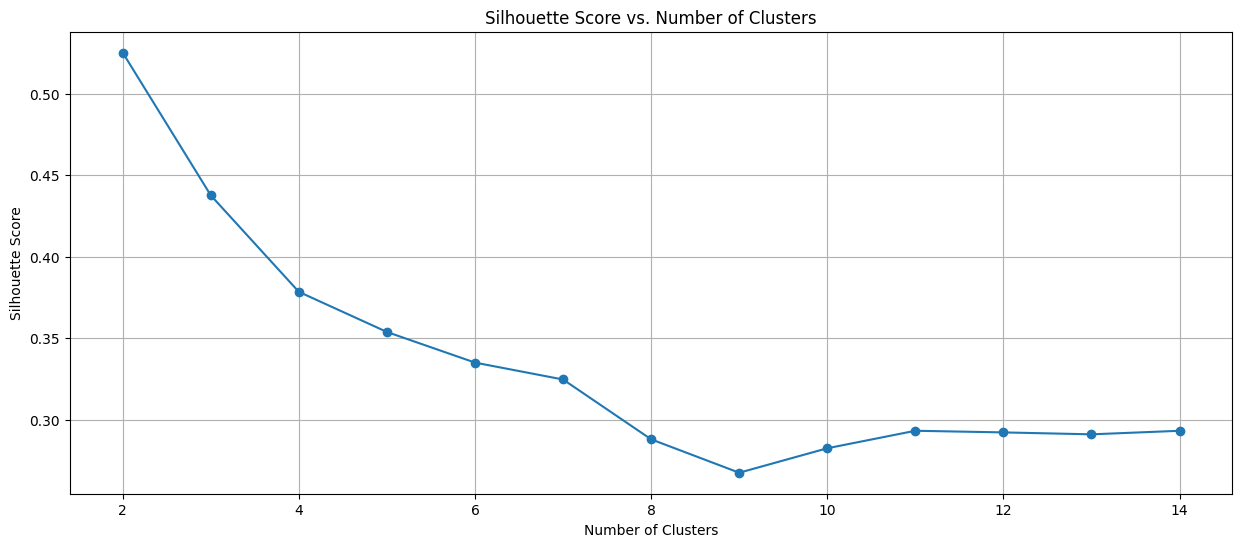

The best k based on silhouette score is: 2


In [16]:
k_values = range(2, 15)  
silhouette_scores = []

# iterate through all k values
for k in k_values:
    # kmeans
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)  # Assuming X is your data
    
    # get cluster labels
    labels = kmeans.labels_
    
    # calculate silhouette score
    silhouette_avg = silhouette_score(X, labels)
    # store score
    silhouette_scores.append(silhouette_avg)

# plot silhoutte score
plt.figure(figsize=(15, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# print highest k
print(f'The best k based on silhouette score is: {k_values[silhouette_scores.index(max(silhouette_scores))]}')

## DBSCAN & comparison 

In [24]:
# range to try
eps_values = np.arange(k_values[silhouette_scores.index(max(silhouette_scores))], 10, 0.5) 
min_samples_values = range(5, 20, 2)

# init
best_s_score = -1  
best_min_samples = None
best_labels = None

# loop through ranges
for eps in eps_values:
    for min_samples in min_samples_values:
        # init DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        # fit model
        dbscan.fit(X)
        
        # get cluster labels
        labels = dbscan.labels_
        
        # get number of clusters
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        # calculate s score for >1 cluster
        if num_clusters > 1:
            s_score = silhouette_score(X, labels)
            
            # save best score
            if s_score > best_s_score:
                best_s_score = s_score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels


print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Clusters: {len(set(best_labels)) - (1 if -1 in best_labels else 0)}")
print(f"Noise points: {list(best_labels).count(-1)}")

Best Silhouette Score: 0.23641248622667244
Best eps: 9.5
Best min_samples: 5
Clusters: 2
Noise points: 38


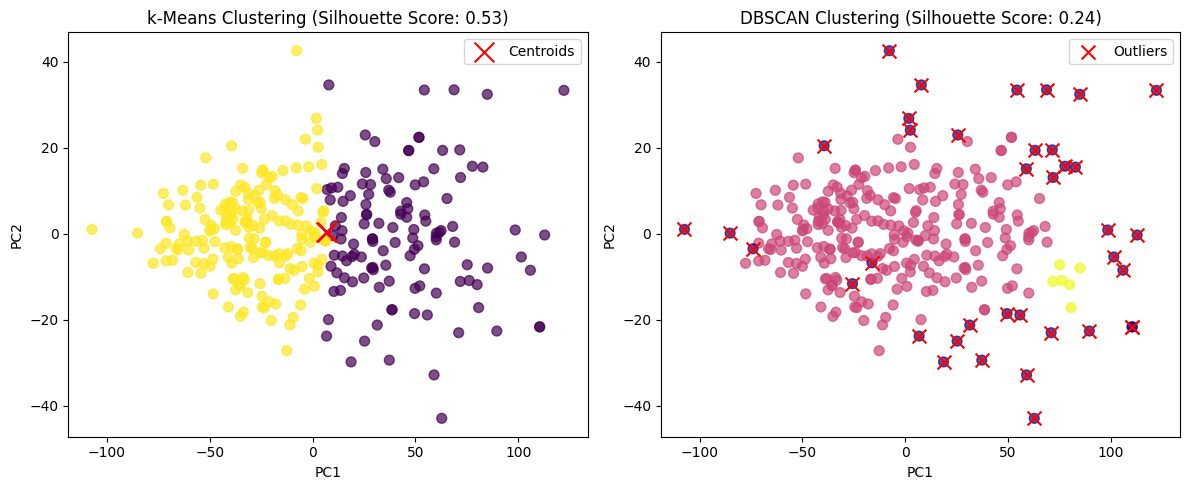

Silhouette Score (k-Means): 0.5251756104915571
Silhouette Score (DBSCAN): 0.23641248622667244
Number of clusters (k-Means): 2
Number of clusters (DBSCAN): 2
Number of noise points in DBSCAN: 38


In [25]:
# COMPARISON PLOT

# K-MEANS
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
kmeans_s_score = silhouette_score(X, kmeans_labels)

# DBSCAN
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(X)
dbscan_labels = dbscan.labels_
# number of clusters
num_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
dbscan_s_score = silhouette_score(X, dbscan_labels) if n_clusters_dbscan > 1 else -1

# --- Visualization of Clusters (2D PCA Projection) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# K-MEANS PLOT
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x', label='Centroids')
plt.title(f'k-Means Clustering (Silhouette Score: {kmeans_silhouette:.2f})')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

# DBSCAN PLOT
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='plasma', marker='o', s=50, alpha=0.7)
plt.scatter(X_pca[dbscan_labels == -1, 0], X_pca[dbscan_labels == -1, 1], c='red', marker='x', s=100, label='Outliers')
plt.title(f"DBSCAN Clustering (Silhouette Score: {dbscan_silhouette:.2f})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Silhouette Score (k-Means): {kmeans_s_score}")
print(f"Silhouette Score (DBSCAN): {dbscan_s_score}")
print(f"Number of clusters (k-Means): {len(set(kmeans_labels))}")
print(f"Number of clusters (DBSCAN): {num_clusters_dbscan}")
print(f"Number of noise points in DBSCAN: {list(dbscan_labels).count(-1)}")